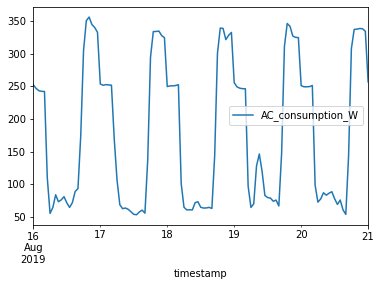

,AC_consumption_W
timestamp,


,AC_consumption_W
timestamp,


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_rows', 500)
df = pd.read_csv("../data/microgrid_processed_august.csv")
df.index = pd.to_datetime(df['timestamp'])
#Set
start_date =  "8/16/2019 0:00"
end_date = "8/21/2019 0:00"

#Parameter
dev = "AC_consumption_W"
                 
df_hist = df[start_date:end_date][dev].to_frame()

df_hist.plot()
plt.show()
display(df_hist[~np.isfinite(df_hist).all(1)])
display(df_hist[np.isnan(df_hist).all(1)])

In [4]:
# Get forecast 500 steps ahead in future
import statsmodels.api as sm

#Best SARIMA(0, 0, 0)x(0, 2, 2, 24)24 - AIC:6.0, Score:13.667989730834961, Time:0.7667989730834961
mod = sm.tsa.statespace.SARIMAX(df_hist[dev],
                                order=(0,0,0),
                                seasonal_order=(0,1,1, 24),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = mod.fit()
print(results.mle_retvals)
pred_uc = results.get_forecast(steps=48)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


{'fopt': 3.451160087385884, 'gopt': array([9.34230471e-07, 9.47553147e-07]), 'fcalls': 75, 'warnflag': 0, 'converged': True, 'iterations': 22}


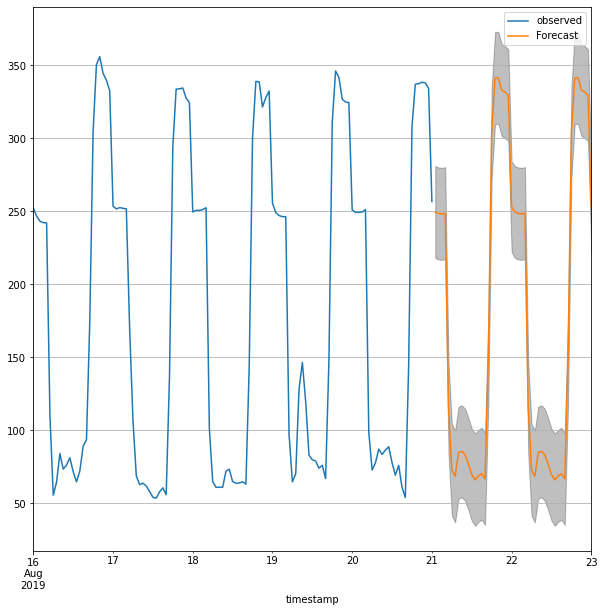

In [5]:

fix,ax = plt.subplots()

df_hist = df[start_date:end_date][dev].to_frame()

ax = df_hist[dev].plot(label='observed', figsize=(10, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.grid()
plt.show()

In [6]:
import itertools
import statsmodels.api as sm
import math 
import datetime
import time
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

##Best SARIMA(1, 1, 2)x(0, 2, 2, 24)24 - AIC:5806.556061333564 - range(0, 3)
##Best SARIMA(1, 1, 1)x(1, 1, 1, 24)24 - AIC:6161.695793029599 - range(0.2)
print('Examples of parameter combinations for Seasonal ARIMA...',datetime.datetime.now())
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

best_mod = None
best_aic = None
best_param = None
best_seasonal = None
best_time = None
best_score = 999000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            start = time.time()
            mod = sm.tsa.statespace.SARIMAX(df_hist[dev],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            end = time.time()-start
            score = results.aic+end*10
            print('SARIMA{}x{}24 - AIC:{},Score:{},ProcTime:{}'.format(param, param_seasonal, results.aic,score,end))
            if best_score > score:
                best_mod = results
                best_aic = results.aic
                best_param = param
                best_seasonal = param_seasonal
                best_score = score
                best_time = end
        except Exception as ex:
            print(ex)
            continue
print('Best SARIMA{}x{}24 - AIC:{}, Score:{}, Time:{}'.format(best_param, best_seasonal, best_aic,best_score,best_time))
print('Finished:',datetime.datetime.now())

Examples of parameter combinations for Seasonal ARIMA... 2020-09-22 12:29:53.332080
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 0, 2, 24)
SARIMAX: (0, 0, 2) x (0, 1, 0, 24)
SARIMAX: (0, 0, 2) x (0, 1, 1, 24)
SARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:1626.8313205562704,Score:1627.0265090786093,ProcTime:0.01951885223388672
SVD did not converge


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: Value

SARIMA(0, 0, 0)x(0, 0, 2, 24)24 - AIC:897.5949306110717,Score:904.8466081241943,ProcTime:0.7251677513122559
SARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:863.0126144498572,Score:863.383493623136,ProcTime:0.03708791732788086


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:611.1459388113199,Score:615.3232206678567,ProcTime:0.4177281856536865


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(0, 1, 2, 24)24 - AIC:427.96838693525086,Score:438.15019540693055,ProcTime:1.0181808471679688
SARIMA(0, 0, 0)x(0, 2, 0, 24)24 - AIC:728.4388405567436,Score:729.5222026592521,ProcTime:0.10833621025085449


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:901: R

SARIMA(0, 0, 0)x(0, 2, 1, 24)24 - AIC:nan,Score:nan,ProcTime:1.0448412895202637
SARIMA(0, 0, 0)x(0, 2, 2, 24)24 - AIC:204.20822049746164,Score:239.70453645357736,ProcTime:3.5496315956115723
SARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:872.43750133403,Score:873.3943704593962,ProcTime:0.0956869125366211


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:833.7366218756423,Score:836.7154760550246,ProcTime:0.2978854179382324


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(1, 0, 2, 24)24 - AIC:638.560395949343,Score:660.9469540052207,ProcTime:2.2386558055877686
SARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:630.220911715171,Score:630.8116223551247,ProcTime:0.05907106399536133


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:613.1453142028754,Score:622.8174886566107,ProcTime:0.9672174453735352


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(1, 1, 2, 24)24 - AIC:429.0543306966419,Score:445.09937654930303,ProcTime:1.6045045852661133
SARIMA(0, 0, 0)x(1, 2, 0, 24)24 - AIC:478.11990428167684,Score:479.45702481466634,ProcTime:0.1337120532989502


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 0, 0)x(1, 2, 1, 24)24 - AIC:nan,Score:nan,ProcTime:1.371847152709961
SARIMA(0, 0, 0)x(1, 2, 2, 24)24 - AIC:196.8560182749074,Score:242.37758752692156,ProcTime:4.552156925201416


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 0, 0, 24)24 - AIC:632.2027344747629,Score:634.8688573881235,ProcTime:0.26661229133605957


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 0, 1, 24)24 - AIC:632.9858183764186,Score:645.1642298601832,ProcTime:1.2178411483764648


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 0, 2, 24)24 - AIC:625.4742920541084,Score:653.1510102891243,ProcTime:2.767671823501587
SARIMA(0, 0, 0)x(2, 1, 0, 24)24 - AIC:427.23873280019427,Score:428.8003172728505,ProcTime:0.156158447265625


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 1, 1, 24)24 - AIC:427.9298746515712,Score:446.06836675896255,ProcTime:1.8138492107391357


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 1, 2, 24)24 - AIC:408.1552631805515,Score:429.31717943650244,ProcTime:2.1161916255950928


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 2, 0, 24)24 - AIC:197.886501970561,Score:209.42864102390573,ProcTime:1.1542139053344727


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(2, 2, 1, 24)24 - AIC:nan,Score:nan,ProcTime:2.6697402000427246


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 0)x(2, 2, 2, 24)24 - AIC:198.82290897688685,Score:284.0137845071298,ProcTime:8.519087553024292
SARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:1472.357310001187,Score:1473.4894573133513,ProcTime:0.11321473121643066


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:1103.283947905329,Score:1107.833939989832,ProcTime:0.4549992084503174


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 0, 2, 24)24 - AIC:805.6155891288099,Score:818.8540692199049,ProcTime:1.323848009109497
SARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:792.8954392012431,Score:793.8516455229594,ProcTime:0.09562063217163086


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:567.7663217282748,Score:574.0958533978915,ProcTime:0.6329531669616699


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 1, 2, 24)24 - AIC:386.77268210220257,Score:406.2014621810905,ProcTime:1.942878007888794


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 2, 0, 24)24 - AIC:672.5950926859337,Score:676.836051376577,ProcTime:0.42409586906433105


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 2, 1, 24)24 - AIC:409.40765037091666,Score:424.70670117886954,ProcTime:1.529905080795288


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(0, 2, 2, 24)24 - AIC:186.8771523936113,Score:234.43625874355638,ProcTime:4.755910634994507


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:809.7578973387041,Score:814.7503633116045,ProcTime:0.49924659729003906
SARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:772.8766027033868,Score:778.7860718310418,ProcTime:0.5909469127655029


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 1)x(1, 0, 2, 24)24 - AIC:589.7586595682525,Score:621.2909018663787,ProcTime:3.153224229812622
SARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:588.3009952818375,Score:592.6239365850906,ProcTime:0.4322941303253174


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:575.6547866283472,Score:583.9838824688013,ProcTime:0.8329095840454102


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 1, 2, 24)24 - AIC:388.57245465699003,Score:416.8935444015579,ProcTime:2.832108974456787


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 2, 0, 24)24 - AIC:440.6026553380162,Score:453.1443356740147,ProcTime:1.2541680335998535


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 2, 1, 24)24 - AIC:411.3247797111244,Score:432.93662520444104,ProcTime:2.161184549331665


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(1, 2, 2, 24)24 - AIC:185.4014070630121,Score:247.3214443326044,ProcTime:6.1920037269592285


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 1)x(2, 0, 0, 24)24 - AIC:635.9784589824999,Score:654.7632657108629,ProcTime:1.8784806728363037
SARIMA(0, 0, 1)x(2, 0, 1, 24)24 - AIC:592.0625654050293,Score:624.1423312016907,ProcTime:3.2079765796661377


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 1)x(2, 0, 2, 24)24 - AIC:579.3428525502122,Score:619.7369393879808,ProcTime:4.0394086837768555
SARIMA(0, 0, 1)x(2, 1, 0, 24)24 - AIC:397.1769885927193,Score:410.78979538974687,ProcTime:1.3612806797027588


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 1, 1, 24)24 - AIC:386.7432891798332,Score:412.9121171903923,ProcTime:2.616882801055908


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 1, 2, 24)24 - AIC:365.6141829033124,Score:408.41755862429017,ProcTime:4.280337572097778


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 2, 0, 24)24 - AIC:190.73475987449325,Score:224.79662568107284,ProcTime:3.406186580657959


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 1)x(2, 2, 1, 24)24 - AIC:192.356109127755,Score:251.47166679834825,ProcTime:5.911555767059326


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(2, 2, 2, 24)24 - AIC:181.374180870079,Score:306.86579282762904,ProcTime:12.549161195755005
SARIMA(0, 0, 2)x(0, 0, 0, 24)24 - AIC:1374.4665941987582,Score:1375.9454211984225,ProcTime:0.14788269996643066


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 0, 1, 24)24 - AIC:1035.4677817069078,Score:1040.5190273962999,ProcTime:0.505124568939209


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 0, 2, 24)24 - AIC:750.3168439995185,Score:776.820516599311,ProcTime:2.650367259979248
SARIMA(0, 0, 2)x(0, 1, 0, 24)24 - AIC:774.0473327845698,Score:775.345417043603,ProcTime:0.1298084259033203


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 1, 1, 24)24 - AIC:553.1955166488657,Score:560.1850553184519,ProcTime:0.6989538669586182


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 1, 2, 24)24 - AIC:366.23793935714053,Score:384.12566280303287,ProcTime:1.7887723445892334


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 2, 0, 24)24 - AIC:658.9006562547763,Score:663.6945457773288,ProcTime:0.479388952255249


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 2, 1, 24)24 - AIC:392.6970094024271,Score:418.93723185649816,ProcTime:2.6240222454071045


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(0, 2, 2, 24)24 - AIC:181.1139013299077,Score:235.13456602183274,ProcTime:5.402066469192505


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 0, 24)24 - AIC:798.5660259683643,Score:803.7518064935718,ProcTime:0.518578052520752


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 0, 1, 24)24 - AIC:753.780066761334,Score:761.1180970996213,ProcTime:0.7338030338287354


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 2)x(1, 0, 2, 24)24 - AIC:575.2856941478551,Score:615.0934810893834,ProcTime:3.980778694152832
SARIMA(0, 0, 2)x(1, 1, 0, 24)24 - AIC:576.7377946766676,Score:581.6410515698255,ProcTime:0.4903256893157959


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 1, 1, 24)24 - AIC:557.1551273586252,Score:566.0276435138682,ProcTime:0.887251615524292


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 1, 2, 24)24 - AIC:366.80448507099544,Score:400.8252212884942,ProcTime:3.402073621749878


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 2, 0, 24)24 - AIC:422.47816839346046,Score:438.47132005819435,ProcTime:1.5993151664733887


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 2, 1, 24)24 - AIC:388.13524350574306,Score:416.34245738437465,ProcTime:2.820721387863159


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(1, 2, 2, 24)24 - AIC:180.59500714202545,Score:248.76339455505035,ProcTime:6.81683874130249


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 2)x(2, 0, 0, 24)24 - AIC:584.3067302196505,Score:609.9874844043734,ProcTime:2.56807541847229
SARIMA(0, 0, 2)x(2, 0, 1, 24)24 - AIC:580.2658968422895,Score:614.2257314179426,ProcTime:3.3959834575653076


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 0, 2)x(2, 0, 2, 24)24 - AIC:561.1339028849795,Score:611.3709720149234,ProcTime:5.023706912994385
SARIMA(0, 0, 2)x(2, 1, 0, 24)24 - AIC:387.0629864587536,Score:412.68616970918083,ProcTime:2.5623183250427246


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 1, 1, 24)24 - AIC:378.01873392225053,Score:422.3812741673067,ProcTime:4.436254024505615


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 1, 2, 24)24 - AIC:353.66515194725713,Score:393.21892773461065,ProcTime:3.9553775787353516


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 2, 0, 24)24 - AIC:192.69493197263614,Score:229.80154846967594,ProcTime:3.7106616497039795


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 0, 2)x(2, 2, 1, 24)24 - AIC:194.33875141178845,Score:264.75482997929333,ProcTime:7.041607856750488


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 2)x(2, 2, 2, 24)24 - AIC:182.6016402625738,Score:317.8709698104559,ProcTime:13.526932954788208
SARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:1272.984327100916,Score:1273.2576000920965,ProcTime:0.027327299118041992
SARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:954.8057331879444,Score:956.4551653702564,ProcTime:0.16494321823120117

C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 0, 2, 24)24 - AIC:703.6545194173368,Score:711.8650783086332,ProcTime:0.8210558891296387
SARIMA(0, 1, 0)x(0, 1, 0, 24)24 - AIC:811.0583074982886,Score:811.4996798928504,ProcTime:0.04413723945617676


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 1, 0)x(0, 1, 1, 24)24 - AIC:2443.819398450527,Score:2462.9817409988973,ProcTime:1.9162342548370361
SARIMA(0, 1, 0)x(0, 1, 2, 24)24 - AIC:393.19427280256497,Score:403.3330228788589,ProcTime:1.0138750076293945
SARIMA(0, 1, 0)x(0, 2, 0, 24)24 - AIC:689.0994859878983,Score:690.4382635300126,ProcTime:0.13387775421142578


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 2, 1, 24)24 - AIC:420.20154027807865,Score:427.90770320761357,ProcTime:0.7706162929534912


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 2, 2, 24)24 - AIC:195.9477923015868,Score:220.2699825863158,ProcTime:2.4322190284729004
SARIMA(0, 1, 0)x(1, 0, 0, 24)24 - AIC:819.7858861545324,Score:820.6374100307225,ProcTime:0.08515238761901855


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 1, 24)24 - AIC:780.9894780856658,Score:783.7433342677642,ProcTime:0.27538561820983887


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 0, 2, 24)24 - AIC:599.9303041151508,Score:611.3942800215228,ProcTime:1.146397590637207
SARIMA(0, 1, 0)x(1, 1, 0, 24)24 - AIC:588.2436447389374,Score:588.985767865921,ProcTime:0.07421231269836426


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 1, 24)24 - AIC:2702.101112551038,Score:2716.5614687865423,ProcTime:1.446035623550415


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 2, 24)24 - AIC:394.5104262446076,Score:411.8450638865143,ProcTime:1.7334637641906738
SARIMA(0, 1, 0)x(1, 2, 0, 24)24 - AIC:437.1380090231978,Score:438.73862976981036,ProcTime:0.16006207466125488


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 2, 1, 24)24 - AIC:411.97103999341476,Score:428.0409529038762,ProcTime:1.6069912910461426


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 2, 2, 24)24 - AIC:189.9606512031255,Score:224.53780154797414,ProcTime:3.4577150344848633


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 0, 24)24 - AIC:588.3739299023428,Score:590.9219211781301,ProcTime:0.25479912757873535


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 1, 24)24 - AIC:590.1003304030514,Score:601.1046925093747,ProcTime:1.1004362106323242


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 24)24 - AIC:584.7380895924538,Score:604.0262170147865,ProcTime:1.9288127422332764
SARIMA(0, 1, 0)x(2, 1, 0, 24)24 - AIC:397.8585380108269,Score:399.5046585590752,ProcTime:0.1646120548248291


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 1, 0)x(2, 1, 1, 24)24 - AIC:1803.6161786230916,Score:1848.3277064474935,ProcTime:4.4711527824401855


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 2, 24)24 - AIC:377.12336291569534,Score:407.7968620230562,ProcTime:3.067349910736084


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 2, 0, 24)24 - AIC:189.62089916154645,Score:193.13727518007062,ProcTime:0.351637601852417


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 2, 1, 24)24 - AIC:191.61976236888705,Score:238.31635136195956,ProcTime:4.669658899307251


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 2, 2, 24)24 - AIC:191.78468319310198,Score:270.3247365607167,ProcTime:7.854005336761475
SARIMA(0, 1, 1)x(0, 0, 0, 24)24 - AIC:1240.0527970219803,Score:1240.5113069440079,ProcTime:0.04585099220275879


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 1, 24)24 - AIC:930.379938949827,Score:932.4624823229349,ProcTime:0.20825433731079102


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 0, 2, 24)24 - AIC:684.483517831831,Score:693.4343568744946,ProcTime:0.8950839042663574
SARIMA(0, 1, 1)x(0, 1, 0, 24)24 - AIC:800.3211243717152,Score:801.2190373508412,ProcTime:0.08979129791259766


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 1, 1)x(0, 1, 1, 24)24 - AIC:2934.3581479709674,Score:2951.1784881275225,ProcTime:1.6820340156555176
SARIMA(0, 1, 1)x(0, 1, 2, 24)24 - AIC:379.6913490211075,Score:396.51976203075105,ProcTime:1.6828413009643555


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 2, 0, 24)24 - AIC:679.1775773985154,Score:682.0329236013657,ProcTime:0.2855346202850342


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 2, 1, 24)24 - AIC:402.2926730207633,Score:417.75851908246983,ProcTime:1.5465846061706543


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 2, 2, 24)24 - AIC:191.43368574674977,Score:235.16214224394216,ProcTime:4.372845649719238
SARIMA(0, 1, 1)x(1, 0, 0, 24)24 - AIC:816.8592939194759,Score:818.6063203629574,ProcTime:0.17470264434814453


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 1, 1)x(1, 0, 1, 24)24 - AIC:777.6356633872429,Score:784.4337042540947,ProcTime:0.6798040866851807


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 0, 2, 24)24 - AIC:591.0509049919609,Score:620.8441984680657,ProcTime:2.9793293476104736
SARIMA(0, 1, 1)x(1, 1, 0, 24)24 - AIC:586.7591338251275,Score:590.0089292619866,ProcTime:0.3249795436859131


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 1, 1)x(1, 1, 1, 24)24 - AIC:2788.422125117276,Score:2808.8409454984408,ProcTime:2.041882038116455
SARIMA(0, 1, 1)x(1, 1, 2, 24)24 - AIC:381.2131861149756,Score:398.01299843187013,ProcTime:1.6799812316894531


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 2, 0, 24)24 - AIC:428.6231286853189,Score:440.38641050752346,ProcTime:1.176328182220459


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 2, 1, 24)24 - AIC:400.0200237723892,Score:419.51585907664946,ProcTime:1.9495835304260254


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 2, 2, 24)24 - AIC:178.06436303769817,Score:252.53038886701336,ProcTime:7.4466025829315186


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 1, 1)x(2, 0, 0, 24)24 - AIC:591.3440042465232,Score:610.1626115768455,ProcTime:1.8818607330322266
SARIMA(0, 1, 1)x(2, 0, 1, 24)24 - AIC:587.2737924104208,Score:603.1262675767416,ProcTime:1.58524751663208


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 1, 1)x(2, 0, 2, 24)24 - AIC:583.3301758045931,Score:617.2606086010713,ProcTime:3.393043279647827
SARIMA(0, 1, 1)x(2, 1, 0, 24)24 - AIC:393.2634734409519,Score:404.7617792385288,ProcTime:1.1498305797576904


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 1, 1, 24)24 - AIC:1696.0343234240434,Score:1767.777697294893,ProcTime:7.174337387084961


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 2, 24)24 - AIC:364.4328397382465,Score:408.1724375356403,ProcTime:4.37395977973938


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 2, 0, 24)24 - AIC:186.43601537979737,Score:224.8051178578247,ProcTime:3.8369102478027344


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 2, 1, 24)24 - AIC:200.55946693055859,Score:264.6333752595686,ProcTime:6.407390832901001


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 2, 2, 24)24 - AIC:179.59042382085804,Score:314.09134459341055,ProcTime:13.450092077255249
SARIMA(0, 1, 2)x(0, 0, 0, 24)24 - AIC:1232.5290749543917,Score:1233.1045625680697,ProcTime:0.05754876136779785


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 1, 24)24 - AIC:923.2290979095973,Score:925.8154864975489,ProcTime:0.258638858795166


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 0, 2, 24)24 - AIC:677.5043533885214,Score:688.7334560000631,ProcTime:1.1229102611541748
SARIMA(0, 1, 2)x(0, 1, 0, 24)24 - AIC:777.6529427447346,Score:779.0001865305927,ProcTime:0.13472437858581543


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 1, 24)24 - AIC:2782.6995103971753,Score:2799.767519773701,ProcTime:1.706800937652588


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 2, 24)24 - AIC:372.80527106313195,Score:390.085897360129,ProcTime:1.728062629699707


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 2, 0, 24)24 - AIC:656.5337237485528,Score:662.1640977033258,ProcTime:0.5630373954772949


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 2, 1, 24)24 - AIC:392.36641420625597,Score:409.14368166231066,ProcTime:1.6777267456054688


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 2, 2, 24)24 - AIC:176.89187095704972,Score:229.01513622346818,ProcTime:5.212326526641846


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 0, 24)24 - AIC:801.6008787202434,Score:804.8669891404704,ProcTime:0.3266110420227051


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 1, 24)24 - AIC:758.3739445205426,Score:763.8604614730573,ProcTime:0.5486516952514648


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 0, 2, 24)24 - AIC:577.9721739736758,Score:603.782820984479,ProcTime:2.5810647010803223


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 0, 24)24 - AIC:583.3307318909733,Score:588.6987405045597,ProcTime:0.5368008613586426


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 1, 24)24 - AIC:2638.878275211259,Score:2659.596332366868,ProcTime:2.071805715560913


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 2, 24)24 - AIC:374.1529345772373,Score:406.5675640366184,ProcTime:3.2414629459381104


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 2, 0, 24)24 - AIC:430.6065875270988,Score:447.01576053887857,ProcTime:1.6409173011779785


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 2, 1, 24)24 - AIC:391.954493958302,Score:413.7804798668103,ProcTime:2.18259859085083


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 2, 2, 24)24 - AIC:169.34491913382075,Score:251.7666224724438,ProcTime:8.242170333862305


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 0, 24)24 - AIC:585.3273286212882,Score:602.2538866390189,ProcTime:1.6926558017730713


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 0, 1, 24)24 - AIC:587.3216802119433,Score:609.9385768412768,ProcTime:2.2616896629333496


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 1, 2)x(2, 0, 2, 24)24 - AIC:568.2007679288272,Score:604.4970950429324,ProcTime:3.6296327114105225
SARIMA(0, 1, 2)x(2, 1, 0, 24)24 - AIC:391.2844467482878,Score:406.21113303521406,ProcTime:1.492668628692627


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 1, 1, 24)24 - AIC:1807.953251651031,Score:1875.2386987716975,ProcTime:6.72854471206665


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 2, 24)24 - AIC:350.9533653025958,Score:400.7549414401385,ProcTime:4.9801576137542725


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 2, 0, 24)24 - AIC:192.25863640418373,Score:241.29753534903847,ProcTime:4.903889894485474


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 2, 1, 24)24 - AIC:186.2645817312881,Score:261.61875729891506,ProcTime:7.535417556762695


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 2, 2, 24)24 - AIC:172.42290002705207,Score:299.43617565037357,ProcTime:12.701327562332153
SARIMA(0, 2, 0)x(0, 0, 0, 24)24 - AIC:1281.6125855045145,Score:1281.8663582401102,ProcTime:0.025377273559570312
SARIMA(0, 2, 0)x(0, 0, 1, 24)24 - AIC:965.7990600440118,Score:967.404737648687,ProcTime:0.1605677604675293


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: Value

SARIMA(0, 2, 0)x(0, 0, 2, 24)24 - AIC:710.8084339727521,Score:718.12939115659,ProcTime:0.7320957183837891
SARIMA(0, 2, 0)x(0, 1, 0, 24)24 - AIC:857.1652164024573,Score:857.584914163993,ProcTime:0.04196977615356445


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 2, 0)x(0, 1, 1, 24)24 - AIC:2735.737982086995,Score:2751.664552979329,ProcTime:1.5926570892333984
SARIMA(0, 2, 0)x(0, 1, 2, 24)24 - AIC:402.50012071333964,Score:414.39212472640116,ProcTime:1.1892004013061523
SARIMA(0, 2, 0)x(0, 2, 0, 24)24 - AIC:722.5324953399547,Score:724.0412271819957,ProcTime:0.15087318420410156


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(0, 2, 1, 24)24 - AIC:431.5445600903529,Score:442.06202139024913,ProcTime:1.051746129989624


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(0, 2, 2, 24)24 - AIC:202.04578792619037,Score:223.67999946641254,ProcTime:2.163421154022217
SARIMA(0, 2, 0)x(1, 0, 0, 24)24 - AIC:866.4874749822695,Score:867.4634581251223,ProcTime:0.09759831428527832


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(1, 0, 1, 24)24 - AIC:823.79692586561,Score:826.0807708134249,ProcTime:0.22838449478149414


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(1, 0, 2, 24)24 - AIC:626.5756057324578,Score:643.4459541859795,ProcTime:1.6870348453521729
SARIMA(0, 2, 0)x(1, 1, 0, 24)24 - AIC:617.371496366698,Score:618.1522933713977,ProcTime:0.0780797004699707


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 2, 0)x(1, 1, 1, 24)24 - AIC:2916.845469425134,Score:2938.1028222541136,ProcTime:2.125735282897949
SARIMA(0, 2, 0)x(1, 1, 2, 24)24 - AIC:403.549286750117,Score:416.77270593957013,ProcTime:1.3223419189453125
SARIMA(0, 2, 0)x(1, 2, 0, 24)24 - AIC:442.60312285068164,Score:444.20896019580493,ProcTime:0.1605837345123291


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(1, 2, 1, 24)24 - AIC:422.58735827029165,Score:438.3605330330175,ProcTime:1.577317476272583


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(1, 2, 2, 24)24 - AIC:202.33934433401052,Score:231.99528248250905,ProcTime:2.9655938148498535


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(2, 0, 0, 24)24 - AIC:611.6044650649777,Score:614.5264444923154,ProcTime:0.29219794273376465


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(2, 0, 1, 24)24 - AIC:613.3444742800132,Score:624.6836070658103,ProcTime:1.133913278579712


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(2, 0, 2, 24)24 - AIC:607.2558330573609,Score:621.2315629996826,ProcTime:1.3975729942321777
SARIMA(0, 2, 0)x(2, 1, 0, 24)24 - AIC:409.814724189,Score:411.5031997978257,ProcTime:0.16884756088256836


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(0, 2, 0)x(2, 1, 1, 24)24 - AIC:1933.5670383326049,Score:1980.6757099977965,ProcTime:4.710867166519165
SARIMA(0, 2, 0)x(2, 1, 2, 24)24 - AIC:389.99757550544854,Score:422.731876595689,ProcTime:3.273430109024048


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(2, 2, 0, 24)24 - AIC:201.58645240533892,Score:205.41236249673906,ProcTime:0.38259100914001465


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(2, 2, 1, 24)24 - AIC:203.58955952808708,Score:249.81133553669304,ProcTime:4.622177600860596


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 0)x(2, 2, 2, 24)24 - AIC:198.03366649565126,Score:259.0971158784332,ProcTime:6.106344938278198
SARIMA(0, 2, 1)x(0, 0, 0, 24)24 - AIC:1261.4070525609611,Score:1261.8459191762565,ProcTime:0.043886661529541016


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(0, 0, 1, 24)24 - AIC:941.1284890372035,Score:943.6751952368495,ProcTime:0.2546706199645996


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(0, 0, 2, 24)24 - AIC:689.5462042952231,Score:706.7355711126975,ProcTime:1.7189366817474365


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(0, 1, 0, 24)24 - AIC:801.4835971474583,Score:803.6015337586339,ProcTime:0.2117936611175537


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 2, 1)x(0, 1, 1, 24)24 - AIC:2170.6371643637426,Score:2194.6842959021337,ProcTime:2.4047131538391113
SARIMA(0, 2, 1)x(0, 1, 2, 24)24 - AIC:382.28942719754474,Score:405.4086240893294,ProcTime:2.311919689178467


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(0, 2, 0, 24)24 - AIC:676.8670005519524,Score:681.717714758648,ProcTime:0.48507142066955566


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(0, 2, 1, 24)24 - AIC:408.2801995970247,Score:422.9588566519258,ProcTime:1.4678657054901123


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(0, 2, 2, 24)24 - AIC:184.3787261258775,Score:226.3673874150926,ProcTime:4.198866128921509


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(1, 0, 0, 24)24 - AIC:818.8426593366322,Score:821.9659236493764,ProcTime:0.31232643127441406


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(1, 0, 1, 24)24 - AIC:773.1597547492748,Score:781.1526327094799,ProcTime:0.7992877960205078


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(1, 0, 2, 24)24 - AIC:591.0505757471938,Score:612.2194967409987,ProcTime:2.116892099380493


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(1, 1, 0, 24)24 - AIC:587.387809461528,Score:594.1131493510544,ProcTime:0.6725339889526367


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 2, 1)x(1, 1, 1, 24)24 - AIC:2210.777743245763,Score:2239.9800018326464,ProcTime:2.9202258586883545
SARIMA(0, 2, 1)x(1, 1, 2, 24)24 - AIC:382.69148743256756,Score:417.5128332386894,ProcTime:3.4821345806121826


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(1, 2, 0, 24)24 - AIC:434.9487371721949,Score:449.9817009249415,ProcTime:1.5032963752746582


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(1, 2, 1, 24)24 - AIC:401.9579582879005,Score:426.9452243515907,ProcTime:2.4987266063690186


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(1, 2, 2, 24)24 - AIC:179.47449908617344,Score:224.4729946649393,ProcTime:4.499849557876587


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 0, 0, 24)24 - AIC:587.544003739505,Score:602.6736772204926,ProcTime:1.5129673480987549


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 0, 1, 24)24 - AIC:589.359255928871,Score:607.1862231682509,ProcTime:1.7826967239379883


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 0, 2, 24)24 - AIC:575.5877807435578,Score:604.8599555787629,ProcTime:2.927217483520508


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 1, 0, 24)24 - AIC:396.5339627971312,Score:426.235748838391,ProcTime:2.9701786041259766


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 1)x(2, 1, 1, 24)24 - AIC:1524.2257945566657,Score:1599.352208855677,ProcTime:7.512641429901123


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 1, 2, 24)24 - AIC:368.2447954365316,Score:414.5461984821859,ProcTime:4.63014030456543


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 2, 0, 24)24 - AIC:188.12071105476153,Score:226.46768113609087,ProcTime:3.8346970081329346


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 2, 1, 24)24 - AIC:198.31040992509128,Score:247.27932586442233,ProcTime:4.8968915939331055


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 1)x(2, 2, 2, 24)24 - AIC:177.48328091537067,Score:243.0395925227315,ProcTime:6.555631160736084
SARIMA(0, 2, 2)x(0, 0, 0, 24)24 - AIC:1226.5091768419893,Score:1227.329126945749,ProcTime:0.08199501037597656


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(0, 0, 1, 24)24 - AIC:916.8029834971397,Score:920.302496169564,ProcTime:0.34995126724243164


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(0, 0, 2, 24)24 - AIC:670.4536960985691,Score:686.8472193148167,ProcTime:1.6393523216247559


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(0, 1, 0, 24)24 - AIC:790.4432206106649,Score:792.5763134909139,ProcTime:0.21330928802490234


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 2, 2)x(0, 1, 1, 24)24 - AIC:2637.0205784217683,Score:2667.703776396927,ProcTime:3.068319797515869
SARIMA(0, 2, 2)x(0, 1, 2, 24)24 - AIC:368.82711521341275,Score:392.77351251794767,ProcTime:2.394639730453491


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(0, 2, 0, 24)24 - AIC:666.6132572426336,Score:673.0451110138433,ProcTime:0.6431853771209717


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(0, 2, 1, 24)24 - AIC:390.7454324467143,Score:412.3046899540385,ProcTime:2.155925750732422


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(0, 2, 2, 24)24 - AIC:179.14679415037446,Score:288.04480440428074,ProcTime:10.889801025390625


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(1, 0, 0, 24)24 - AIC:815.3558723697369,Score:819.9821250209515,ProcTime:0.46262526512145996


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(1, 0, 1, 24)24 - AIC:764.3988005400803,Score:771.3480250121262,ProcTime:0.6949224472045898


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 2, 2)x(1, 0, 2, 24)24 - AIC:581.9763319680634,Score:622.5324051568451,ProcTime:4.055607318878174
SARIMA(0, 2, 2)x(1, 1, 0, 24)24 - AIC:585.4908280423219,Score:593.7350158742006,ProcTime:0.8244187831878662


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 2, 2)x(1, 1, 1, 24)24 - AIC:2771.48000408208,Score:2815.6432573894226,ProcTime:4.416325330734253
SARIMA(0, 2, 2)x(1, 1, 2, 24)24 - AIC:370.0164888283465,Score:399.99898890464044,ProcTime:2.9982500076293945


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(1, 2, 0, 24)24 - AIC:425.8588581521172,Score:444.3437176186699,ProcTime:1.8484859466552734


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(1, 2, 1, 24)24 - AIC:389.8064599394473,Score:415.4916892408999,ProcTime:2.5685229301452637


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(1, 2, 2, 24)24 - AIC:161.10613161871922,Score:306.73988634894386,ProcTime:14.563375473022461


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(2, 0, 0, 24)24 - AIC:584.0206213095178,Score:605.2136011221398,ProcTime:2.119297981262207


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(0, 2, 2)x(2, 0, 1, 24)24 - AIC:586.3327995856223,Score:621.3423196394858,ProcTime:3.5009520053863525


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(2, 0, 2, 24)24 - AIC:566.3031577404985,Score:609.0098356541642,ProcTime:4.270667791366577
SARIMA(0, 2, 2)x(2, 1, 0, 24)24 - AIC:389.9207491871367,Score:447.1880764957915,ProcTime:5.7267327308654785


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(2, 1, 1, 24)24 - AIC:2003.2932890355955,Score:2081.6803778112303,ProcTime:7.838708877563477


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(2, 1, 2, 24)24 - AIC:354.88582695363806,Score:407.50917042135046,ProcTime:5.26233434677124


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(0, 2, 2)x(2, 2, 0, 24)24 - AIC:184.74481325374447,Score:247.79262047038875,ProcTime:6.304780721664429


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(2, 2, 1, 24)24 - AIC:197.6217316990464,Score:319.38666576200416,ProcTime:12.176493406295776


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 2, 2)x(2, 2, 2, 24)24 - AIC:163.7936711001033,Score:320.5605363535518,ProcTime:15.676686525344849
SARIMA(1, 0, 0)x(0, 0, 0, 24)24 - AIC:1282.9816471165013,Score:1283.3723174160314,ProcTime:0.03906702995300293


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(1, 0, 0)x(0, 0, 1, 24)24 - AIC:1033.8427111241524,Score:1039.2391058537667,ProcTime:0.5396394729614258
SARIMA(1, 0, 0)x(0, 0, 2, 24)24 - AIC:713.6965753356135,Score:726.2898184577143,ProcTime:1.259324312210083
SARIMA(1, 0, 0)x(0, 1, 0, 24)24 - AIC:804.1990128988923,Score:804.4818822378816,ProcTime:0.02828693389892578


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(0, 1, 1, 24)24 - AIC:573.1540753108849,Score:578.4029938442101,ProcTime:0.5248918533325195


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(0, 1, 2, 24)24 - AIC:395.4947772820355,Score:410.3200879891278,ProcTime:1.4825310707092285
SARIMA(1, 0, 0)x(0, 2, 0, 24)24 - AIC:686.9569830688661,Score:687.7085046562379,ProcTime:0.07515215873718262


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(0, 2, 1, 24)24 - AIC:422.9476090067959,Score:435.4505010241604,ProcTime:1.2502892017364502


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(0, 2, 2, 24)24 - AIC:198.62910898430607,Score:228.52590473397038,ProcTime:2.9896795749664307
SARIMA(1, 0, 0)x(1, 0, 0, 24)24 - AIC:805.7279590240636,Score:807.3687342277684,ProcTime:0.1640775203704834


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 0, 1, 24)24 - AIC:776.0922025481161,Score:781.5278290549215,ProcTime:0.543562650680542


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 0)x(1, 0, 2, 24)24 - AIC:597.2905088617058,Score:629.9929000093193,ProcTime:3.2702391147613525
SARIMA(1, 0, 0)x(1, 1, 0, 24)24 - AIC:578.2166505664316,Score:581.7107320636239,ProcTime:0.3494081497192383


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 1, 1, 24)24 - AIC:580.0818298268248,Score:586.9444368290831,ProcTime:0.6862607002258301


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 1, 2, 24)24 - AIC:396.79617938454373,Score:430.0673252051614,ProcTime:3.3271145820617676


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 2, 0, 24)24 - AIC:432.5998404970916,Score:442.4565556994231,ProcTime:0.9856715202331543


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 2, 1, 24)24 - AIC:423.09878099852233,Score:440.7508181422296,ProcTime:1.7652037143707275


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(1, 2, 2, 24)24 - AIC:192.5205583509671,Score:238.92739724485747,ProcTime:4.640683889389038


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 0, 0, 24)24 - AIC:579.6547057985252,Score:588.0101993440575,ProcTime:0.8355493545532227


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 0, 1, 24)24 - AIC:581.4348047973773,Score:600.604547858443,ProcTime:1.9169743061065674


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 0)x(2, 0, 2, 24)24 - AIC:583.6540459638952,Score:621.8645380979895,ProcTime:3.821049213409424
SARIMA(1, 0, 0)x(2, 1, 0, 24)24 - AIC:391.99771742737477,Score:401.21116022980397,ProcTime:0.9213442802429199


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 1, 1, 24)24 - AIC:384.0563367800421,Score:411.7622112230963,ProcTime:2.77058744430542


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 1, 2, 24)24 - AIC:378.8233987121163,Score:407.49960100932697,ProcTime:2.8676202297210693


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 2, 0, 24)24 - AIC:186.13920993782625,Score:219.3024093625699,ProcTime:3.3163199424743652


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 2, 1, 24)24 - AIC:187.8407389138069,Score:238.7165385697212,ProcTime:5.087579965591431


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 0)x(2, 2, 2, 24)24 - AIC:194.50699703959265,Score:268.6715473440055,ProcTime:7.416455030441284
SARIMA(1, 0, 1)x(0, 0, 0, 24)24 - AIC:1248.6001564626536,Score:1249.1600872640452,ProcTime:0.055993080139160156


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(1, 0, 1)x(0, 0, 1, 24)24 - AIC:1006.0241666141998,Score:1012.7036276165496,ProcTime:0.6679461002349854
SARIMA(1, 0, 1)x(0, 0, 2, 24)24 - AIC:693.3535677853445,Score:708.209062284551,ProcTime:1.4855494499206543
SARIMA(1, 0, 1)x(0, 1, 0, 24)24 - AIC:782.0873778301029,Score:783.3561819034367,ProcTime:0.12688040733337402


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 1, 1, 24)24 - AIC:560.9013123741828,Score:568.5506530037604,ProcTime:0.7649340629577637


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 1, 2, 24)24 - AIC:377.30523593114447,Score:396.2615276067121,ProcTime:1.8956291675567627


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 2, 0, 24)24 - AIC:667.423885512075,Score:671.767090010366,ProcTime:0.43432044982910156


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 2, 1, 24)24 - AIC:399.29307778676144,Score:416.3290580113708,ProcTime:1.7035980224609375


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(0, 2, 2, 24)24 - AIC:188.0577647601114,Score:237.92013763532503,ProcTime:4.986237287521362


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 0, 24)24 - AIC:791.3181742900622,Score:794.3890294307482,ProcTime:0.3070855140686035


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 0, 1, 24)24 - AIC:760.44636848343,Score:765.0393736637889,ProcTime:0.45930051803588867


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 1)x(1, 0, 2, 24)24 - AIC:582.5239141880675,Score:618.6617430149718,ProcTime:3.6137828826904297
SARIMA(1, 0, 1)x(1, 1, 0, 24)24 - AIC:570.7245244665485,Score:575.6829704923969,ProcTime:0.49584460258483887


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 1, 1, 24)24 - AIC:565.6694505072139,Score:573.6434385633968,ProcTime:0.7973988056182861


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 1, 2, 24)24 - AIC:379.0014969264347,Score:404.38727249253577,ProcTime:2.5385775566101074


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 2, 0, 24)24 - AIC:419.9209716375318,Score:434.04412770824104,ProcTime:1.4123156070709229


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 2, 1, 24)24 - AIC:400.9052763748425,Score:428.6827550697583,ProcTime:2.777747869491577


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(1, 2, 2, 24)24 - AIC:187.23268436249091,Score:253.88871120270088,ProcTime:6.665602684020996


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 0, 24)24 - AIC:572.0934193106315,Score:590.9490625830314,ProcTime:1.8855643272399902


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 0, 1, 24)24 - AIC:574.0866861170302,Score:596.4219436472426,ProcTime:2.2335257530212402


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 1)x(2, 0, 2, 24)24 - AIC:568.9655605546368,Score:609.8090926400555,ProcTime:4.08435320854187
SARIMA(1, 0, 1)x(2, 1, 0, 24)24 - AIC:382.7115929984203,Score:396.3017881774059,ProcTime:1.3590195178985596


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 1, 1, 24)24 - AIC:372.1984471330773,Score:405.28461351491325,ProcTime:3.3086166381835938


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 1, 2, 24)24 - AIC:360.4711375770458,Score:410.6685672340282,ProcTime:5.019742965698242


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 2, 0, 24)24 - AIC:185.95548343696532,Score:231.98076438941894,ProcTime:4.602528095245361


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 2, 1, 24)24 - AIC:187.59439305154348,Score:270.5964167484429,ProcTime:8.300202369689941


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 1)x(2, 2, 2, 24)24 - AIC:182.6784621720571,Score:298.29322686245627,ProcTime:11.561476469039917
SARIMA(1, 0, 2)x(0, 0, 0, 24)24 - AIC:1240.8493418439061,Score:1241.483377908054,ProcTime:0.06340360641479492


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(1, 0, 2)x(0, 0, 1, 24)24 - AIC:999.8199965328549,Score:1008.0281617016171,ProcTime:0.8208165168762207
SARIMA(1, 0, 2)x(0, 0, 2, 24)24 - AIC:686.5693377897483,Score:703.3492636129599,ProcTime:1.677992582321167


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 1, 0, 24)24 - AIC:775.9966165870438,Score:777.9193408340226,ProcTime:0.19227242469787598


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 1, 1, 24)24 - AIC:555.0541881301657,Score:567.1646693923727,ProcTime:1.2110481262207031


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 1, 2, 24)24 - AIC:367.7958399592732,Score:394.5642453967427,ProcTime:2.6768405437469482


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 2, 0, 24)24 - AIC:660.9548153950486,Score:668.9779748989854,ProcTime:0.8023159503936768


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(0, 2, 1, 24)24 - AIC:391.7896701701849,Score:428.5652496226995,ProcTime:3.677557945251465


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 0, 2)x(0, 2, 2, 24)24 - AIC:183.13846644796584,Score:299.99005612768383,ProcTime:11.685158967971802


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 2)x(1, 0, 0, 24)24 - AIC:793.6326702732229,Score:799.4401558536672,ProcTime:0.5807485580444336
SARIMA(1, 0, 2)x(1, 0, 1, 24)24 - AIC:755.1559534276861,Score:762.4863066877264,ProcTime:0.7330353260040283


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 2)x(1, 0, 2, 24)24 - AIC:564.9297757691985,Score:611.5078445024138,ProcTime:4.657806873321533
SARIMA(1, 0, 2)x(1, 1, 0, 24)24 - AIC:570.5758238457202,Score:578.3251882217883,ProcTime:0.7749364376068115


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 1, 1, 24)24 - AIC:558.577354030493,Score:571.0294438170225,ProcTime:1.245208978652954


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 1, 2, 24)24 - AIC:369.67349868749204,Score:403.9530621144635,ProcTime:3.4279563426971436


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 2, 0, 24)24 - AIC:415.75916138053867,Score:438.01627006889316,ProcTime:2.225710868835449


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 2, 1, 24)24 - AIC:388.8709399048528,Score:436.6983792130193,ProcTime:4.78274393081665


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(1, 2, 2, 24)24 - AIC:181.81558180242808,Score:295.23135948568614,ProcTime:11.341577768325806


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 2)x(2, 0, 0, 24)24 - AIC:575.001525237517,Score:603.2019394182726,ProcTime:2.8200414180755615
SARIMA(1, 0, 2)x(2, 0, 1, 24)24 - AIC:573.915401235162,Score:605.3759248405087,ProcTime:3.146052360534668


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 0, 2)x(2, 0, 2, 24)24 - AIC:562.1218720039197,Score:604.2653933128187,ProcTime:4.214352130889893
SARIMA(1, 0, 2)x(2, 1, 0, 24)24 - AIC:381.42754316561195,Score:415.3583216690299,ProcTime:3.393077850341797


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 1, 1, 24)24 - AIC:371.8320418974166,Score:427.92965189421227,ProcTime:5.609760999679565


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 1, 2, 24)24 - AIC:355.2966076601721,Score:421.94868867289796,ProcTime:6.665208101272583


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 0, 2)x(2, 2, 0, 24)24 - AIC:186.17063567478274,Score:269.5187620862207,ProcTime:8.334812641143799
SARIMA(1, 0, 2)x(2, 2, 1, 24)24 - AIC:187.701778149022,Score:291.7029759639634,ProcTime:10.40011978149414


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 0, 2)x(2, 2, 2, 24)24 - AIC:176.32406242982148,Score:320.67903050080537,ProcTime:14.435496807098389
SARIMA(1, 1, 0)x(0, 0, 0, 24)24 - AIC:1253.051880371988,Score:1253.276353848398,ProcTime:0.02244734764099121
SARIMA(1, 1, 0)x(0, 0, 1, 24)24 - AIC:943.0005570491794,Score:944.6792837223056,ProcTime:0.16787266731262207

C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 0, 2, 24)24 - AIC:696.3800690970825,Score:707.0455239615844,ProcTime:1.0665454864501953
SARIMA(1, 1, 0)x(0, 1, 0, 24)24 - AIC:811.7854269981298,Score:812.1172555923375,ProcTime:0.03318285942077637


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(1, 1, 0)x(0, 1, 1, 24)24 - AIC:3064.8839213300016,Score:3085.7186772275236,ProcTime:2.0834755897521973
SARIMA(1, 1, 0)x(0, 1, 2, 24)24 - AIC:391.4146075565097,Score:403.93175938909025,ProcTime:1.2517151832580566
SARIMA(1, 1, 0)x(0, 2, 0, 24)24 - AIC:690.5615332660201,Score:691.4793303546431,ProcTime:0.09177970886230469


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 2, 1, 24)24 - AIC:419.35917773213384,Score:430.1858464714527,ProcTime:1.0826668739318848


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 2, 2, 24)24 - AIC:197.80479249022676,Score:225.613513555748,ProcTime:2.780872106552124
SARIMA(1, 1, 0)x(1, 0, 0, 24)24 - AIC:812.9909451194983,Score:814.6595509239417,ProcTime:0.16686058044433594


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 1, 24)24 - AIC:781.9043392276033,Score:786.6281718348725,ProcTime:0.4723832607269287


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 0, 2, 24)24 - AIC:600.173234070208,Score:615.5336991199516,ProcTime:1.5360465049743652


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 0, 24)24 - AIC:581.0206810749498,Score:583.9776055134264,ProcTime:0.29569244384765625


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 1, 0)x(1, 1, 1, 24)24 - AIC:2916.877866781116,Score:2945.3263268831975,ProcTime:2.84484601020813
SARIMA(1, 1, 0)x(1, 1, 2, 24)24 - AIC:392.503425235757,Score:410.1686922264186,ProcTime:1.766526699066162


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 2, 0, 24)24 - AIC:425.40174756615585,Score:435.73364530175155,ProcTime:1.0331897735595703


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 2, 1, 24)24 - AIC:410.71313671337634,Score:430.17817310558826,ProcTime:1.9465036392211914


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 2, 2, 24)24 - AIC:190.94562623204286,Score:239.04279086293275,ProcTime:4.809716463088989


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 0, 24)24 - AIC:579.9699254011891,Score:588.5269803976796,ProcTime:0.8557054996490479


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 1, 24)24 - AIC:581.8289629152555,Score:595.8164182832975,ProcTime:1.3987455368041992


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 0, 2, 24)24 - AIC:583.8287752419516,Score:603.3060687333151,ProcTime:1.9477293491363525


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 0, 24)24 - AIC:390.05227585525785,Score:400.29270191879544,ProcTime:1.0240426063537598


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(2, 1, 1, 24)24 - AIC:1438.171467566467,Score:1552.0103380918272,ProcTime:11.38388705253601


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 2, 24)24 - AIC:377.08757373105743,Score:408.29904052030304,ProcTime:3.1211466789245605


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 2, 0, 24)24 - AIC:184.28584529791686,Score:214.6212644759259,ProcTime:3.0335419178009033


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 2, 1, 24)24 - AIC:195.79729946626912,Score:246.95103319658529,ProcTime:5.115373373031616


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 2, 2, 24)24 - AIC:192.75510923508892,Score:268.8897289479185,ProcTime:7.613461971282959
SARIMA(1, 1, 1)x(0, 0, 0, 24)24 - AIC:1242.0201036540855,Score:1242.527920922457,ProcTime:0.0507817268371582


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 1, 24)24 - AIC:931.6057311700037,Score:934.3971144364526,ProcTime:0.27913832664489746


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 0, 2, 24)24 - AIC:686.0098583205046,Score:700.2995354636015,ProcTime:1.4289677143096924
SARIMA(1, 1, 1)x(0, 1, 0, 24)24 - AIC:798.4898430378278,Score:800.1249462635358,ProcTime:0.16351032257080078


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(1, 1, 1)x(0, 1, 1, 24)24 - AIC:2843.190332019344,Score:2865.5333834529074,ProcTime:2.2343051433563232
SARIMA(1, 1, 1)x(0, 1, 2, 24)24 - AIC:381.58727294840713,Score:399.04874212183853,ProcTime:1.7461469173431396


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 2, 0, 24)24 - AIC:676.8072333666341,Score:681.7449488970296,ProcTime:0.4937715530395508


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 2, 1, 24)24 - AIC:403.7313031330949,Score:425.0325154438859,ProcTime:2.1301212310791016


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 2, 2, 24)24 - AIC:190.10164753333856,Score:248.0018450392895,ProcTime:5.790019750595093


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 0, 24)24 - AIC:807.6703921256754,Score:811.9550362525675,ProcTime:0.428464412689209


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 0, 1, 24)24 - AIC:772.7888769298647,Score:780.6380266338442,ProcTime:0.7849149703979492


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 1, 1)x(1, 0, 2, 24)24 - AIC:590.2088336799635,Score:627.2934989784254,ProcTime:3.7084665298461914
SARIMA(1, 1, 1)x(1, 1, 0, 24)24 - AIC:581.026680402068,Score:587.1730756085194,ProcTime:0.6146395206451416


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 1, 1)x(1, 1, 1, 24)24 - AIC:2697.242859998196,Score:2723.5666410116846,ProcTime:2.632378101348877
SARIMA(1, 1, 1)x(1, 1, 2, 24)24 - AIC:383.16251394621827,Score:407.67060634963013,ProcTime:2.4508092403411865


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 2, 0, 24)24 - AIC:422.34426373697846,Score:438.74913567759125,ProcTime:1.6404871940612793


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 2, 1, 24)24 - AIC:401.85821237967525,Score:435.6845659296325,ProcTime:3.3826353549957275


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 2, 2, 24)24 - AIC:178.66703936471532,Score:250.73336789025853,ProcTime:7.206632852554321


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 0, 24)24 - AIC:580.0258690964541,Score:592.3294264923892,ProcTime:1.2303557395935059


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 1, 24)24 - AIC:581.9951177245295,Score:605.6543779975092,ProcTime:2.3659260272979736


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 0, 2, 24)24 - AIC:576.8611377307848,Score:608.383774144359,ProcTime:3.152263641357422


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 0, 24)24 - AIC:387.59669960987145,Score:408.0123299504476,ProcTime:2.041563034057617


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 1, 1, 24)24 - AIC:1495.4706379251493,Score:1578.9571496324552,ProcTime:8.34865117073059


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 2, 24)24 - AIC:365.0691374103344,Score:417.3701651851452,ProcTime:5.230102777481079


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 2, 0, 24)24 - AIC:180.30254340274033,Score:226.51721930606064,ProcTime:4.621467590332031


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 2, 1, 24)24 - AIC:192.12928516170703,Score:273.17772847912033,ProcTime:8.104844331741333


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 2, 2, 24)24 - AIC:180.28350926366184,Score:313.1810937019858,ProcTime:13.289758443832397
SARIMA(1, 1, 2)x(0, 0, 0, 24)24 - AIC:1232.4833134930766,Score:1233.1664995473063,ProcTime:0.06831860542297363


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 1, 24)24 - AIC:918.5036963794004,Score:923.0298919055234,ProcTime:0.4526195526123047


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 0, 2, 24)24 - AIC:674.2990239407371,Score:695.4327352787803,ProcTime:2.1133711338043213


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 0, 24)24 - AIC:772.3928565219738,Score:774.4397277072766,ProcTime:0.20468711853027344


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 1, 2)x(0, 1, 1, 24)24 - AIC:3175.056500418024,Score:3197.101244909601,ProcTime:2.204474449157715
SARIMA(1, 1, 2)x(0, 1, 2, 24)24 - AIC:366.58874632614175,Score:390.46110750930825,ProcTime:2.3872361183166504


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 2, 0, 24)24 - AIC:655.1822843379883,Score:666.2091746158509,ProcTime:1.1026890277862549


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 2, 1, 24)24 - AIC:388.02211274095464,Score:411.80374134965825,ProcTime:2.3781628608703613


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 2, 2, 24)24 - AIC:178.6028605861453,Score:249.03399528692046,ProcTime:7.043113470077515


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 0, 24)24 - AIC:789.5123725868211,Score:795.5153757072435,ProcTime:0.6003003120422363


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 1, 24)24 - AIC:752.7920266296217,Score:760.6428047324964,ProcTime:0.7850778102874756


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 24)24 - AIC:573.9600563258034,Score:602.4619126528603,ProcTime:2.8501856327056885


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 0, 24)24 - AIC:568.2950492275949,Score:578.6732430828805,ProcTime:1.0378193855285645


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 1, 2)x(1, 1, 1, 24)24 - AIC:3031.2372255962146,Score:3058.353328768517,ProcTime:2.7116103172302246
SARIMA(1, 1, 2)x(1, 1, 2, 24)24 - AIC:368.2266884801352,Score:403.66776761984465,ProcTime:3.5441079139709473


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 2, 0, 24)24 - AIC:416.020961373562,Score:437.8600316936914,ProcTime:2.1839070320129395


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 2, 1, 24)24 - AIC:387.61582520001355,Score:418.632015252046,ProcTime:3.101619005203247


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 2, 2, 24)24 - AIC:170.75977357601323,Score:271.6585186359803,ProcTime:10.089874505996704


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 0, 0, 24)24 - AIC:570.7969416601596,Score:600.2613510115085,ProcTime:2.9464409351348877


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 1, 2)x(2, 0, 1, 24)24 - AIC:574.3386080399914,Score:612.3548081056042,ProcTime:3.8016200065612793
SARIMA(1, 1, 2)x(2, 0, 2, 24)24 - AIC:560.2137980085205,Score:594.5851454358886,ProcTime:3.4371347427368164


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 0, 24)24 - AIC:379.3975210322039,Score:401.34598494898245,ProcTime:2.1948463916778564


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 24)24 - AIC:1663.354367390292,Score:1746.3329450041226,ProcTime:8.297857761383057


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 24)24 - AIC:349.68455248386505,Score:428.0622475674832,ProcTime:7.837769508361816


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 2, 0, 24)24 - AIC:179.09791166369158,Score:253.3471720892592,ProcTime:7.424926042556763


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 2, 1, 24)24 - AIC:180.89347133400173,Score:307.4490333533499,ProcTime:12.655556201934814


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 2, 2, 24)24 - AIC:169.80513317056636,Score:309.00162441202144,ProcTime:13.919649124145508
SARIMA(1, 2, 0)x(0, 0, 0, 24)24 - AIC:1280.2426014568887,Score:1280.5354009296975,ProcTime:0.02927994728088379


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(0, 0, 1, 24)24 - AIC:965.0926046046957,Score:967.5814180049642,ProcTime:0.24888134002685547


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(0, 0, 2, 24)24 - AIC:711.127517521318,Score:720.9039214252792,ProcTime:0.9776403903961182
SARIMA(1, 2, 0)x(0, 1, 0, 24)24 - AIC:855.4928334707764,Score:855.8734615797547,ProcTime:0.03806281089782715


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(1, 2, 0)x(0, 1, 1, 24)24 - AIC:2952.5560991899274,Score:2967.649583114793,ProcTime:1.5093483924865723
SARIMA(1, 2, 0)x(0, 1, 2, 24)24 - AIC:404.3119720550635,Score:417.8908161254981,ProcTime:1.357884407043457
SARIMA(1, 2, 0)x(0, 2, 0, 24)24 - AIC:721.5580866242107,Score:722.3978159332927,ProcTime:0.08397293090820312


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(0, 2, 1, 24)24 - AIC:433.4823862482771,Score:445.40946878688186,ProcTime:1.1927082538604736


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(0, 2, 2, 24)24 - AIC:203.41447479165637,Score:233.63314754403675,ProcTime:3.021867275238037
SARIMA(1, 2, 0)x(1, 0, 0, 24)24 - AIC:856.5584554962155,Score:858.2469239524838,ProcTime:0.16884684562683105


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(1, 0, 1, 24)24 - AIC:821.033077069097,Score:824.3612549980215,ProcTime:0.33281779289245605


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(1, 0, 2, 24)24 - AIC:625.3571767257205,Score:648.1150121139041,ProcTime:2.2757835388183594


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(1, 1, 0, 24)24 - AIC:607.5141560391805,Score:610.8423220471761,ProcTime:0.33281660079956055


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 0)x(1, 1, 1, 24)24 - AIC:2989.9991471571207,Score:3009.553554753709,ProcTime:1.9554407596588135
SARIMA(1, 2, 0)x(1, 1, 2, 24)24 - AIC:405.30292936077115,Score:421.5251369070053,ProcTime:1.622220754623413


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(1, 2, 0, 24)24 - AIC:436.1875690856096,Score:448.9392651953813,ProcTime:1.2751696109771729


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(1, 2, 1, 24)24 - AIC:423.9365050587616,Score:443.23729727601625,ProcTime:1.9300792217254639


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(1, 2, 2, 24)24 - AIC:198.9342942381993,Score:236.66743899833114,ProcTime:3.7733144760131836


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 0, 0, 24)24 - AIC:603.0886999974049,Score:614.0523568997181,ProcTime:1.0963656902313232


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 0, 1, 24)24 - AIC:604.4420110368084,Score:621.6543828629802,ProcTime:1.7212371826171875


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 0, 2, 24)24 - AIC:606.2292117172776,Score:626.6476887756883,ProcTime:2.0418477058410645


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 1, 0, 24)24 - AIC:403.8468574452252,Score:415.01771678207825,ProcTime:1.1170859336853027


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 0)x(2, 1, 1, 24)24 - AIC:1898.6185961623878,Score:1978.666496839115,ProcTime:8.00479006767273


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 1, 2, 24)24 - AIC:391.7483518374576,Score:421.9828984988346,ProcTime:3.0234546661376953


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 2, 0, 24)24 - AIC:192.99351438516547,Score:226.84995159143378,ProcTime:3.385643720626831


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 2, 1, 24)24 - AIC:194.96834434345686,Score:288.9869347937437,ProcTime:9.401859045028687


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 0)x(2, 2, 2, 24)24 - AIC:200.73656699011184,Score:267.4422397310481,ProcTime:6.670567274093628
SARIMA(1, 2, 1)x(0, 0, 0, 24)24 - AIC:1240.1093935686345,Score:1240.948750944733,ProcTime:0.08393573760986328


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(0, 0, 1, 24)24 - AIC:929.7802713230507,Score:936.0097816303627,ProcTime:0.6229510307312012


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(0, 0, 2, 24)24 - AIC:682.7005200092511,Score:700.2645735447126,ProcTime:1.7564053535461426
SARIMA(1, 2, 1)x(0, 1, 0, 24)24 - AIC:802.1534154727069,Score:804.0613434626666,ProcTime:0.19079279899597168

C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 1)x(0, 1, 1, 24)24 - AIC:2678.224255854507,Score:2703.9114044255216,ProcTime:2.5687148571014404
SARIMA(1, 2, 1)x(0, 1, 2, 24)24 - AIC:380.64728353693425,Score:413.83710954859197,ProcTime:3.3189826011657715


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(0, 2, 0, 24)24 - AIC:678.282123164741,Score:685.9195428653636,ProcTime:0.7637419700622559


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(0, 2, 1, 24)24 - AIC:407.5609412224741,Score:426.6505208046885,ProcTime:1.9089579582214355


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(0, 2, 2, 24)24 - AIC:186.2926690396996,Score:234.21404526803212,ProcTime:4.792137622833252


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(1, 0, 0, 24)24 - AIC:862.1899152485774,Score:866.76017529649,ProcTime:0.45702600479125977


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 1)x(1, 0, 1, 24)24 - AIC:774.428424316358,Score:782.3308367309088,ProcTime:0.7902412414550781
SARIMA(1, 2, 1)x(1, 0, 2, 24)24 - AIC:591.3329118540948,Score:614.1591590693658,ProcTime:2.2826247215270996


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(1, 1, 0, 24)24 - AIC:579.4038720510958,Score:587.9142280004977,ProcTime:0.8510355949401855


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 1)x(1, 1, 1, 24)24 - AIC:2714.8998783483235,Score:2744.6542857541767,ProcTime:2.975440740585327
SARIMA(1, 2, 1)x(1, 1, 2, 24)24 - AIC:381.22454317816585,Score:411.8364396930584,ProcTime:3.061189651489258


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(1, 2, 0, 24)24 - AIC:422.4183290828326,Score:443.66167720447567,ProcTime:2.1243348121643066


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(1, 2, 1, 24)24 - AIC:400.64617044281067,Score:434.68728906463684,ProcTime:3.404111862182617


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(1, 2, 2, 24)24 - AIC:180.5532077740197,Score:255.8427576015954,ProcTime:7.528954982757568


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(2, 0, 0, 24)24 - AIC:578.7832908278009,Score:593.7122015600702,ProcTime:1.4928910732269287


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(2, 0, 1, 24)24 - AIC:580.6856241087321,Score:602.5575365881327,ProcTime:2.1871912479400635


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(2, 0, 2, 24)24 - AIC:575.2880795880478,Score:608.2715400143784,ProcTime:3.2983460426330566


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(2, 1, 0, 24)24 - AIC:387.8741594720724,Score:407.99549307116297,ProcTime:2.0121333599090576


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(2, 1, 1, 24)24 - AIC:1690.2567067557825,Score:1787.1993890220178,ProcTime:9.694268226623535


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(2, 1, 2, 24)24 - AIC:368.3214563413334,Score:416.0556310697269,ProcTime:4.7734174728393555


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(2, 2, 0, 24)24 - AIC:195.25162962872747,Score:305.95760134656194,ProcTime:11.070597171783447


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(2, 2, 1, 24)24 - AIC:192.3027382493775,Score:266.0012302995484,ProcTime:7.36984920501709


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 1)x(2, 2, 2, 24)24 - AIC:182.50496895710822,Score:283.591122941178,ProcTime:10.108615398406982
SARIMA(1, 2, 2)x(0, 0, 0, 24)24 - AIC:1228.504492062411,Score:1229.7635281265589,ProcTime:0.12590360641479492


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(0, 0, 1, 24)24 - AIC:917.8449131192635,Score:922.2711325826119,ProcTime:0.44262194633483887


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(0, 0, 2, 24)24 - AIC:671.8224627265191,Score:694.9953824767327,ProcTime:2.3172919750213623


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(0, 1, 0, 24)24 - AIC:788.7502389504525,Score:791.561534936628,ProcTime:0.2811295986175537


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 2)x(0, 1, 1, 24)24 - AIC:2456.1462248407697,Score:2493.6870778642988,ProcTime:3.7540853023529053
SARIMA(1, 2, 2)x(0, 1, 2, 24)24 - AIC:370.71788698025813,Score:397.8285208303558,ProcTime:2.7110633850097656


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(0, 2, 0, 24)24 - AIC:664.4110616778565,Score:675.3210791682435,ProcTime:1.0910017490386963


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(0, 2, 1, 24)24 - AIC:392.2209818404431,Score:422.47990441734737,ProcTime:3.0258922576904297


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(0, 2, 2, 24)24 - AIC:178.53309791498765,Score:263.7280837815343,ProcTime:8.519498586654663


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(1, 0, 0, 24)24 - AIC:805.7670026159627,Score:811.6729479170186,ProcTime:0.5905945301055908


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(1, 0, 1, 24)24 - AIC:764.7351504993974,Score:773.1534268093644,ProcTime:0.8418276309967041


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 2)x(1, 0, 2, 24)24 - AIC:583.7011780312976,Score:634.5155252984484,ProcTime:5.081434726715088
SARIMA(1, 2, 2)x(1, 1, 0, 24)24 - AIC:579.4916798378807,Score:591.5790321137291,ProcTime:1.2087352275848389


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 2)x(1, 1, 1, 24)24 - AIC:2492.452569930369,Score:2537.4016508744303,ProcTime:4.494908094406128
SARIMA(1, 2, 2)x(1, 1, 2, 24)24 - AIC:371.9745388279267,Score:401.4150324116059,ProcTime:2.94404935836792


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(1, 2, 0, 24)24 - AIC:419.5523396259484,Score:445.1578036075768,ProcTime:2.560546398162842


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(1, 2, 1, 24)24 - AIC:391.67719758201486,Score:439.79084647346383,ProcTime:4.8113648891448975


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(1, 2, 2, 24)24 - AIC:163.06749960939,Score:324.9784292892606,ProcTime:16.19109296798706


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(1, 2, 2)x(2, 0, 0, 24)24 - AIC:584.177041876405,Score:625.2441366792615,ProcTime:4.1067094802856445


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(2, 0, 1, 24)24 - AIC:586.0580129675714,Score:627.011100774273,ProcTime:4.095308780670166


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(2, 0, 2, 24)24 - AIC:570.1627391434075,Score:615.5701297378899,ProcTime:4.540739059448242
SARIMA(1, 2, 2)x(2, 1, 0, 24)24 - AIC:385.5168874072864,Score:412.7205736446216,ProcTime:2.7203686237335205


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 1, 1, 24)24 - AIC:1704.5605432864184,Score:1807.2738945361132,ProcTime:10.271335124969482


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 1, 2, 24)24 - AIC:354.9344307894273,Score:457.5116259569688,ProcTime:10.25771951675415


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(1, 2, 2)x(2, 2, 0, 24)24 - AIC:183.59593566224396,Score:250.52119429871857,ProcTime:6.692525863647461


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 2, 1, 24)24 - AIC:188.17629948829804,Score:418.01974431251676,ProcTime:22.984344482421875


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 2, 2, 24)24 - AIC:167.2401113915504,Score:323.9248891282142,ProcTime:15.668477773666382
SARIMA(2, 0, 0)x(0, 0, 0, 24)24 - AIC:1250.5261235248645,Score:1251.0824446689685,ProcTime:0.05563211441040039


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(2, 0, 0)x(0, 0, 1, 24)24 - AIC:1018.4984863006318,Score:1025.102454444095,ProcTime:0.6603968143463135
SARIMA(2, 0, 0)x(0, 0, 2, 24)24 - AIC:705.2860007996011,Score:717.6629863495278,ProcTime:1.2376985549926758
SARIMA(2, 0, 0)x(0, 1, 0, 24)24 - AIC:788.2149709369654,Score:788.5565770771021,ProcTime:0.034160614013671875


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(0, 1, 1, 24)24 - AIC:567.8022999517254,Score:576.010484193974,ProcTime:0.8208184242248535


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(0, 1, 2, 24)24 - AIC:384.70843406872007,Score:404.3884477253363,ProcTime:1.968001365661621
SARIMA(2, 0, 0)x(0, 2, 0, 24)24 - AIC:673.7633471338855,Score:674.7346572725879,ProcTime:0.09713101387023926


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(0, 2, 1, 24)24 - AIC:414.3288533815261,Score:429.59428478563984,ProcTime:1.526543140411377


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(0, 2, 2, 24)24 - AIC:196.1964391190262,Score:237.2399519402237,ProcTime:4.104351282119751


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 0, 0, 24)24 - AIC:789.7712302355936,Score:792.7577877192667,ProcTime:0.29865574836730957


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 0, 1, 24)24 - AIC:762.2073416340426,Score:767.3703841793612,ProcTime:0.5163042545318604


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 0, 2, 24)24 - AIC:589.5951629757167,Score:622.4398494838954,ProcTime:3.284468650817871


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 1, 0, 24)24 - AIC:562.334025894642,Score:566.9309888234139,ProcTime:0.45969629287719727


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 1, 1, 24)24 - AIC:564.304706141758,Score:573.8845029328346,ProcTime:0.957979679107666


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 1, 2, 24)24 - AIC:385.57096014954163,Score:409.8819137666376,ProcTime:2.4310953617095947


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 2, 0, 24)24 - AIC:411.42307096794497,Score:426.2677198059882,ProcTime:1.4844648838043213


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 2, 1, 24)24 - AIC:406.71475586776467,Score:432.7700704086277,ProcTime:2.6055314540863037


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(1, 2, 2, 24)24 - AIC:194.2638282086151,Score:255.19331019179992,ProcTime:6.0929481983184814


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 0, 0, 24)24 - AIC:563.7807147221869,Score:575.0458614545172,ProcTime:1.1265146732330322


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 0, 1, 24)24 - AIC:565.7746416362776,Score:586.8078714641584,ProcTime:2.103322982788086


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 0, 0)x(2, 0, 2, 24)24 - AIC:567.3037094614064,Score:603.8575810930287,ProcTime:3.6553871631622314
SARIMA(2, 0, 0)x(2, 1, 0, 24)24 - AIC:376.772521311758,Score:390.39833622646137,ProcTime:1.362581491470337


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 1, 1, 24)24 - AIC:370.3065304042397,Score:406.4391640903054,ProcTime:3.6132633686065674


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 1, 2, 24)24 - AIC:365.4226591968875,Score:408.03021935466336,ProcTime:4.260756015777588


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 2, 0, 24)24 - AIC:181.03079860826307,Score:220.5850750746327,ProcTime:3.955427646636963


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 2, 1, 24)24 - AIC:182.7477483505844,Score:268.21245477148284,ProcTime:8.546470642089844


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 0)x(2, 2, 2, 24)24 - AIC:189.50396314449887,Score:268.834240587431,ProcTime:7.933027744293213
SARIMA(2, 0, 1)x(0, 0, 0, 24)24 - AIC:1250.083601259567,Score:1250.9863732093352,ProcTime:0.09027719497680664


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(2, 0, 1)x(0, 0, 1, 24)24 - AIC:1010.5187904410501,Score:1018.1335126929422,ProcTime:0.761472225189209
SARIMA(2, 0, 1)x(0, 0, 2, 24)24 - AIC:695.3142535834277,Score:715.2359140067065,ProcTime:1.9921660423278809
SARIMA(2, 0, 1)x(0, 1, 0, 24)24 - AIC:783.959932101297,Score:785.8779523497101,ProcTime:0.1918020248413086

C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 1, 1, 24)24 - AIC:562.1815261339374,Score:571.7565140222736,ProcTime:0.9574987888336182


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 1, 2, 24)24 - AIC:377.1770513377257,Score:399.4514096102782,ProcTime:2.227435827255249


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 2, 0, 24)24 - AIC:669.4238084616633,Score:680.2812451186152,ProcTime:1.0857436656951904


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 2, 1, 24)24 - AIC:400.1451143658729,Score:430.1149520314308,ProcTime:2.996983766555786


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(0, 2, 2, 24)24 - AIC:194.27423086848844,Score:305.10114279475795,ProcTime:11.082691192626953


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 0, 24)24 - AIC:785.8453565413246,Score:790.7644062811622,ProcTime:0.49190497398376465


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 0, 1, 24)24 - AIC:762.1031820140528,Score:769.8092781863855,ProcTime:0.7706096172332764


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 0, 1)x(1, 0, 2, 24)24 - AIC:583.6746114787314,Score:622.0895809230063,ProcTime:3.8414969444274902
SARIMA(2, 0, 1)x(1, 1, 0, 24)24 - AIC:564.0252649307399,Score:571.4721524238735,ProcTime:0.7446887493133545


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 1, 1, 24)24 - AIC:565.952290233808,Score:579.4909869997076,ProcTime:1.3538696765899658


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 1, 2, 24)24 - AIC:378.56222250848464,Score:413.39565136819533,ProcTime:3.4833428859710693


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 2, 0, 24)24 - AIC:410.8895002433752,Score:438.7152753898596,ProcTime:2.7825775146484375


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 2, 1, 24)24 - AIC:398.6609116428765,Score:437.45802792247855,ProcTime:3.879711627960205


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(1, 2, 2, 24)24 - AIC:189.04616860402874,Score:284.7788646603947,ProcTime:9.573269605636597


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 0, 24)24 - AIC:573.5638422126902,Score:604.4672626609935,ProcTime:3.0903420448303223


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 0, 1, 24)24 - AIC:567.4276418850488,Score:605.170685784585,ProcTime:3.7743043899536133


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 0, 1)x(2, 0, 2, 24)24 - AIC:569.0406607186744,Score:610.0297163522193,ProcTime:4.098905563354492
SARIMA(2, 0, 1)x(2, 1, 0, 24)24 - AIC:376.23898522207463,Score:399.2042376215192,ProcTime:2.296525239944458


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 1, 1, 24)24 - AIC:366.63950281913577,Score:433.5045655327588,ProcTime:6.686506271362305


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 1, 2, 24)24 - AIC:362.3515471088491,Score:425.67575298424583,ProcTime:6.332420587539673


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 2, 0, 24)24 - AIC:181.2722701359166,Score:252.1386546421422,ProcTime:7.086638450622559


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 1)x(2, 2, 1, 24)24 - AIC:182.83904877108415,Score:279.1162046472438,ProcTime:9.627715587615967


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 0, 1)x(2, 2, 2, 24)24 - AIC:184.3439425137374,Score:322.3395479824874,ProcTime:13.799560546875
SARIMA(2, 0, 2)x(0, 0, 0, 24)24 - AIC:1242.3774359879096,Score:1243.8511989769538,ProcTime:0.14737629890441895


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(2, 0, 2)x(0, 0, 1, 24)24 - AIC:1006.9672175955709,Score:1015.6638857436117,ProcTime:0.8696668148040771


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 0, 2, 24)24 - AIC:698.5041011130877,Score:739.8009479796954,ProcTime:4.129684686660767
SARIMA(2, 0, 2)x(0, 1, 0, 24)24 - AIC:777.8575165322455,Score:780.6098396828803,ProcTime:0.27523231506347656


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 1, 1, 24)24 - AIC:557.0228477793321,Score:570.1215835886583,ProcTime:1.3098735809326172


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 1, 2, 24)24 - AIC:369.72741488011667,Score:402.1332586148579,ProcTime:3.240584373474121


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 2, 0, 24)24 - AIC:662.6972250401714,Score:673.2295875012614,ProcTime:1.0532362461090088


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 2, 1, 24)24 - AIC:393.78302862135223,Score:427.5630979725485,ProcTime:3.378006935119629


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(0, 2, 2, 24)24 - AIC:184.2734464182079,Score:286.34721121923326,ProcTime:10.207376480102539


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 0, 0, 24)24 - AIC:787.8413491227293,Score:794.3423299767637,ProcTime:0.6500980854034424


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 0, 2)x(1, 0, 1, 24)24 - AIC:757.3573931566541,Score:768.6426624170606,ProcTime:1.1285269260406494
SARIMA(2, 0, 2)x(1, 0, 2, 24)24 - AIC:563.4163459553747,Score:604.1265496029882,ProcTime:4.0710203647613525


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 1, 0, 24)24 - AIC:565.5208584587396,Score:572.7341458122552,ProcTime:0.7213287353515625


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 1, 1, 24)24 - AIC:560.5747611534056,Score:577.7857215415892,ProcTime:1.7210960388183594


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 1, 2, 24)24 - AIC:371.63848555404047,Score:415.38880503493647,ProcTime:4.3750319480896


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 2, 0, 24)24 - AIC:408.05422999765904,Score:442.8511235943082,ProcTime:3.479689359664917


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(1, 2, 1, 24)24 - AIC:390.41812469057834,Score:439.44405128054416,ProcTime:4.902592658996582


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 0, 2)x(1, 2, 2, 24)24 - AIC:180.8248588221466,Score:343.70230881146546,ProcTime:16.287744998931885


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 0, 2)x(2, 0, 0, 24)24 - AIC:569.4186271206195,Score:617.8505147472674,ProcTime:4.843188762664795


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 1, 24)24 - AIC:568.980899428143,Score:609.3193322169918,ProcTime:4.033843278884888


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 0, 2, 24)24 - AIC:567.811302270546,Score:617.0463505646134,ProcTime:4.923504829406738
SARIMA(2, 0, 2)x(2, 1, 0, 24)24 - AIC:376.2629797641566,Score:408.7121179286769,ProcTime:3.2449138164520264


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 0, 2)x(2, 1, 1, 24)24 - AIC:362.1604475499741,Score:451.0692510129563,ProcTime:8.890880346298218


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 0, 2)x(2, 1, 2, 24)24 - AIC:352.5579889826069,Score:444.3949373773823,ProcTime:9.183694839477539


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 0, 2)x(2, 2, 0, 24)24 - AIC:181.05561146964206,Score:251.1671651386179,ProcTime:7.011155366897583


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 0, 2)x(2, 2, 1, 24)24 - AIC:182.43132460001672,Score:339.0086137044784,ProcTime:15.657728910446167


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 0, 2)x(2, 2, 2, 24)24 - AIC:177.42198267577987,Score:346.3984231054674,ProcTime:16.89764404296875
SARIMA(2, 1, 0)x(0, 0, 0, 24)24 - AIC:1241.9627863454134,Score:1242.3043901013643,ProcTime:0.03416037559509277


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 0, 1, 24)24 - AIC:941.1532404448496,Score:943.6518051650035,ProcTime:0.24985647201538086


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 0, 2, 24)24 - AIC:694.6702923295796,Score:706.3835801599324,ProcTime:1.1713287830352783
SARIMA(2, 1, 0)x(0, 1, 0, 24)24 - AIC:785.711848512059,Score:786.0924861577804,ProcTime:0.038063764572143555


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(2, 1, 0)x(0, 1, 1, 24)24 - AIC:2590.4487569867983,Score:2610.86366491908,ProcTime:2.0414907932281494
SARIMA(2, 1, 0)x(0, 1, 2, 24)24 - AIC:381.1133018690818,Score:396.84732353274757,ProcTime:1.5734021663665771
SARIMA(2, 1, 0)x(0, 2, 0, 24)24 - AIC:666.8360516025537,Score:667.974941392135,ProcTime:0.11388897895812988


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 2, 1, 24)24 - AIC:404.4469800184022,Score:420.40266658761607,ProcTime:1.5955686569213867


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 2, 2, 24)24 - AIC:191.64629700339975,Score:230.7258773104066,ProcTime:3.9079580307006836


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 0, 24)24 - AIC:787.3026194783272,Score:789.4399085255684,ProcTime:0.2137289047241211
SARIMA(2, 1, 0)x(1, 0, 1, 24)24 - AIC:765.047281042158,Score:772.0654275570506,ProcTime:0.7018146514892578


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 0, 2, 24)24 - AIC:593.4758045994821,Score:611.1424353444162,ProcTime:1.7666630744934082


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 0, 24)24 - AIC:568.599673846557,Score:572.9135862382196,ProcTime:0.43139123916625977


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 1, 0)x(1, 1, 1, 24)24 - AIC:2573.323549653898,Score:2599.06055870236,ProcTime:2.5737009048461914
SARIMA(2, 1, 0)x(1, 1, 2, 24)24 - AIC:382.762924855245,Score:402.596646969808,ProcTime:1.9833722114562988


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 2, 0, 24)24 - AIC:407.02159852673316,Score:420.43290586163306,ProcTime:1.3411307334899902


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 2, 1, 24)24 - AIC:396.5366138198424,Score:420.1981605269957,ProcTime:2.366154670715332


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 2, 2, 24)24 - AIC:189.05273866959755,Score:248.18048668214027,ProcTime:5.9127748012542725


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 0, 24)24 - AIC:568.6810666841573,Score:578.9104635042256,ProcTime:1.022939682006836


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 1, 24)24 - AIC:570.5631618824417,Score:590.2353840198929,ProcTime:1.9672222137451172


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 24)24 - AIC:572.5500980380102,Score:599.7310129168554,ProcTime:2.7180914878845215


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 0, 24)24 - AIC:373.3763245529886,Score:387.57523097464997,ProcTime:1.4198906421661377


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 1, 1, 24)24 - AIC:1637.7402132794061,Score:1728.3882659718195,ProcTime:9.064805269241333


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 2, 24)24 - AIC:358.9403836231767,Score:405.09263200574503,ProcTime:4.615224838256836


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 2, 0, 24)24 - AIC:169.77106509886968,Score:213.1802958079456,ProcTime:4.340923070907593


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 2, 1, 24)24 - AIC:188.15783445756034,Score:316.44186441819267,ProcTime:12.828402996063232


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 2, 2, 24)24 - AIC:184.3167092918595,Score:273.7503864883622,ProcTime:8.943367719650269
SARIMA(2, 1, 1)x(0, 0, 0, 24)24 - AIC:1243.9548094798438,Score:1244.657522015702,ProcTime:0.07027125358581543


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 1, 24)24 - AIC:933.0418644238248,Score:937.0381031323209,ProcTime:0.3996238708496094


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 0, 2, 24)24 - AIC:687.9589242637047,Score:715.994832009066,ProcTime:2.803590774536133


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 0, 24)24 - AIC:785.8539520209803,Score:788.5043512290491,ProcTime:0.26503992080688477


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 1, 1)x(0, 1, 1, 24)24 - AIC:2781.613635035208,Score:2815.356081934622,ProcTime:3.3742446899414062
SARIMA(2, 1, 1)x(0, 1, 2, 24)24 - AIC:373.7251934670994,Score:415.279210534055,ProcTime:4.155401706695557


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 2, 0, 24)24 - AIC:668.7771858446475,Score:675.8394779436466,ProcTime:0.7062292098999023


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 2, 1, 24)24 - AIC:398.0876691611425,Score:422.4524863036291,ProcTime:2.4364817142486572


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 2, 2, 24)24 - AIC:185.10808601982308,Score:252.88541212684822,ProcTime:6.777732610702515


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 0, 24)24 - AIC:787.8151628703271,Score:791.1662480563317,ProcTime:0.33510851860046387


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 1, 24)24 - AIC:762.6796994709528,Score:768.9456258320367,ProcTime:0.6265926361083984


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 0, 2, 24)24 - AIC:581.1127811476898,Score:609.9673300788116,ProcTime:2.8854548931121826


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 0, 24)24 - AIC:560.1001260912213,Score:573.8780711328778,ProcTime:1.3777945041656494


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 1, 1)x(1, 1, 1, 24)24 - AIC:2673.0954972931404,Score:2714.6963636108894,ProcTime:4.160086631774902
SARIMA(2, 1, 1)x(1, 1, 2, 24)24 - AIC:374.73381298612276,Score:417.74276989530244,ProcTime:4.300895690917969


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 2, 0, 24)24 - AIC:405.95438485588346,Score:432.6840615793637,ProcTime:2.6729676723480225


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 2, 1, 24)24 - AIC:393.5358973385822,Score:423.5777421834003,ProcTime:3.0041844844818115


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 2, 2, 24)24 - AIC:179.22564505920687,Score:288.00292729721343,ProcTime:10.87772822380066


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 0, 24)24 - AIC:563.2179035057609,Score:583.7984193672721,ProcTime:2.058051586151123


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 1, 24)24 - AIC:565.1925664364638,Score:597.8611712872329,ProcTime:3.2668604850769043


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 0, 2, 24)24 - AIC:566.3228221858104,Score:605.6244965518077,ProcTime:3.9301674365997314


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 0, 24)24 - AIC:372.95823800360273,Score:409.40023171698164,ProcTime:3.6441993713378906


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 1, 24)24 - AIC:1768.1180676278227,Score:1820.6976469811552,ProcTime:5.257957935333252


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 24)24 - AIC:360.182420352199,Score:415.47360096285576,ProcTime:5.529118061065674


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 2, 0, 24)24 - AIC:168.83385515819347,Score:229.44196320186413,ProcTime:6.060810804367065


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 2, 1, 24)24 - AIC:170.43578009393076,Score:303.6359200933204,ProcTime:13.320013999938965


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 2, 2, 24)24 - AIC:172.39383554634185,Score:313.41433859047027,ProcTime:14.102050304412842
SARIMA(2, 1, 2)x(0, 0, 0, 24)24 - AIC:1233.1402452161963,Score:1234.6104247739966,ProcTime:0.1470179557800293


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 1, 24)24 - AIC:920.3276013473399,Score:926.6292213539011,ProcTime:0.6301620006561279


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 0, 2, 24)24 - AIC:676.141786545788,Score:709.5618653002131,ProcTime:3.342007875442505


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 0, 24)24 - AIC:774.3120103736842,Score:777.84228619537,ProcTime:0.3530275821685791


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 1, 2)x(0, 1, 1, 24)24 - AIC:2714.867699876616,Score:2749.726613298247,ProcTime:3.485891342163086
SARIMA(2, 1, 2)x(0, 1, 2, 24)24 - AIC:366.4552177223374,Score:400.6659616264512,ProcTime:3.421074390411377


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 2, 0, 24)24 - AIC:657.1818610247612,Score:675.2097316798211,ProcTime:1.8027870655059814


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 2, 1, 24)24 - AIC:388.20207218736743,Score:412.99085955232715,ProcTime:2.4788787364959717


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 2, 2, 24)24 - AIC:179.0765864446609,Score:274.4192654684036,ProcTime:9.534267902374268


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 0, 24)24 - AIC:783.8999513814545,Score:791.9597868154144,ProcTime:0.8059835433959961


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 1, 2)x(1, 0, 1, 24)24 - AIC:758.5898798793027,Score:770.4056257098385,ProcTime:1.1815745830535889


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 0, 2, 24)24 - AIC:579.2548565951713,Score:621.5089135257133,ProcTime:4.225405693054199
SARIMA(2, 1, 2)x(1, 1, 0, 24)24 - AIC:561.7330114138518,Score:578.7458054316436,ProcTime:1.7012794017791748


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 1, 2)x(1, 1, 1, 24)24 - AIC:2571.048650243444,Score:2613.26793620841,ProcTime:4.221928596496582
SARIMA(2, 1, 2)x(1, 1, 2, 24)24 - AIC:367.89369756082766,Score:421.09377080301516,ProcTime:5.32000732421875


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 2, 0, 24)24 - AIC:406.6976875638619,Score:434.4692129468575,ProcTime:2.7771525382995605


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 2, 1, 24)24 - AIC:387.52533278123616,Score:429.61841425554036,ProcTime:4.20930814743042


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 2, 2, 24)24 - AIC:171.88289625455783,Score:324.91583807279517,ProcTime:15.30329418182373


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 0, 24)24 - AIC:564.5717467859273,Score:596.740700204659,ProcTime:3.216895341873169


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 0, 1, 24)24 - AIC:566.4844486271741,Score:611.0681578671338,ProcTime:4.458370923995972


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 1, 2)x(2, 0, 2, 24)24 - AIC:560.6628865963768,Score:611.2644524342369,ProcTime:5.060156583786011
SARIMA(2, 1, 2)x(2, 1, 0, 24)24 - AIC:372.79942660865,Score:402.3675361209791,ProcTime:2.95681095123291


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 1, 1, 24)24 - AIC:1711.4047637186945,Score:1809.0633764468134,ProcTime:9.76586127281189


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 2, 24)24 - AIC:351.27290344894504,Score:424.4339022702036,ProcTime:7.3160998821258545


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 2, 0, 24)24 - AIC:175.01038732173666,Score:249.67445554378256,ProcTime:7.46640682220459


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 2, 1, 24)24 - AIC:168.23381966904842,Score:311.92060298279966,ProcTime:14.368678331375122


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 2, 2, 24)24 - AIC:162.81539580530827,Score:324.67530629343696,ProcTime:16.185991048812866
SARIMA(2, 2, 0)x(0, 0, 0, 24)24 - AIC:1261.4731874323797,Score:1261.7273249484015,ProcTime:0.02541375160217285


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(0, 0, 1, 24)24 - AIC:954.6622583663449,Score:957.3556349074826,ProcTime:0.26933765411376953


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(0, 0, 2, 24)24 - AIC:703.116702839472,Score:715.3850291219733,ProcTime:1.226832628250122
SARIMA(2, 2, 0)x(0, 1, 0, 24)24 - AIC:820.2298630140745,Score:820.649539317938,ProcTime:0.04196763038635254


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWa

SARIMA(2, 2, 0)x(0, 1, 1, 24)24 - AIC:2816.6253383043486,Score:2843.084724653073,ProcTime:2.6459386348724365
SARIMA(2, 2, 0)x(0, 1, 2, 24)24 - AIC:394.55158348320407,Score:409.89463682411593,ProcTime:1.5343053340911865
SARIMA(2, 2, 0)x(0, 2, 0, 24)24 - AIC:687.8052875560297,Score:688.7907025378718,ProcTime:0.0985414981842041


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(0, 2, 1, 24)24 - AIC:415.0562317881702,Score:431.3261588130115,ProcTime:1.6269927024841309


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(0, 2, 2, 24)24 - AIC:196.44308731673596,Score:245.36022112487194,ProcTime:4.891713380813599


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(1, 0, 0, 24)24 - AIC:822.0038700279687,Score:824.1608309921716,ProcTime:0.21569609642028809


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(1, 0, 1, 24)24 - AIC:796.7720056341265,Score:800.8711982534502,ProcTime:0.40991926193237305


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(1, 0, 2, 24)24 - AIC:616.5196616892263,Score:639.7094447855397,ProcTime:2.3189783096313477


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(1, 1, 0, 24)24 - AIC:594.9775844929758,Score:599.9063736317697,ProcTime:0.49287891387939453


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 0)x(1, 1, 1, 24)24 - AIC:2812.425383994381,Score:2844.05755228738,ProcTime:3.1632168292999268
SARIMA(2, 2, 0)x(1, 1, 2, 24)24 - AIC:396.51681400061267,Score:421.16082883597034,ProcTime:2.4644014835357666


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(1, 2, 0, 24)24 - AIC:421.1194923340721,Score:435.41789321297836,ProcTime:1.429840087890625


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(1, 2, 1, 24)24 - AIC:411.33090253134026,Score:435.0965141798998,ProcTime:2.376561164855957


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(1, 2, 2, 24)24 - AIC:192.6817441129569,Score:254.25762654780186,ProcTime:6.157588243484497


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 0, 0, 24)24 - AIC:591.5642726727998,Score:601.4023411580598,ProcTime:0.983806848526001


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 0, 1, 24)24 - AIC:593.3972997931879,Score:608.5155673293513,ProcTime:1.511826753616333


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 0, 2, 24)24 - AIC:595.0476294389849,Score:616.2073140970355,ProcTime:2.1159684658050537


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 1, 0, 24)24 - AIC:385.6415009735593,Score:399.5838403938779,ProcTime:1.3942339420318604


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 1, 1, 24)24 - AIC:1852.5025774542494,Score:1914.6835638586683,ProcTime:6.2180986404418945


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 1, 2, 24)24 - AIC:368.9967820411812,Score:417.6113602882515,ProcTime:4.861457824707031


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 2, 0, 24)24 - AIC:176.99525050019705,Score:215.5375044712969,ProcTime:3.8542253971099854


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 0)x(2, 2, 1, 24)24 - AIC:178.82240309170825,Score:250.4901124422942,ProcTime:7.166770935058594


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 0)x(2, 2, 2, 24)24 - AIC:180.65069923586202,Score:301.2062836665566,ProcTime:12.055558443069458
SARIMA(2, 2, 1)x(0, 0, 0, 24)24 - AIC:1238.623708764088,Score:1239.521631279957,ProcTime:0.08979225158691406


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(0, 0, 1, 24)24 - AIC:927.7663546609531,Score:931.6020232247959,ProcTime:0.38356685638427734


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(0, 0, 2, 24)24 - AIC:680.7440342289958,Score:700.4982866627727,ProcTime:1.9754252433776855


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(0, 1, 0, 24)24 - AIC:784.3992331440276,Score:787.2979548389739,ProcTime:0.2898721694946289


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 1)x(0, 1, 1, 24)24 - AIC:2682.2130636500365,Score:2715.8558038996703,ProcTime:3.364274024963379
SARIMA(2, 2, 1)x(0, 1, 2, 24)24 - AIC:370.5347105779626,Score:403.718721560476,ProcTime:3.3184010982513428


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(0, 2, 0, 24)24 - AIC:664.0423678839825,Score:674.329409548106,ProcTime:1.0287041664123535


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(0, 2, 1, 24)24 - AIC:393.212255123241,Score:418.78347504435305,ProcTime:2.557121992111206


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(0, 2, 2, 24)24 - AIC:180.4867941830149,Score:240.4717738125315,ProcTime:5.99849796295166


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(1, 0, 0, 24)24 - AIC:786.541635945318,Score:792.031834080694,ProcTime:0.5490198135375977


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 1)x(1, 0, 1, 24)24 - AIC:765.6020926213398,Score:775.7915829396381,ProcTime:1.018949031829834
SARIMA(2, 2, 1)x(1, 0, 2, 24)24 - AIC:584.8146256746762,Score:610.6981167139523,ProcTime:2.5883491039276123


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(1, 1, 0, 24)24 - AIC:567.1144755124715,Score:577.8895147084859,ProcTime:1.0775039196014404


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(1, 1, 1, 24)24 - AIC:2719.150947394727,Score:2749.8948181298956,ProcTime:3.0743870735168457


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(1, 1, 2, 24)24 - AIC:371.9540907456884,Score:411.31618276381585,ProcTime:3.936209201812744


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(1, 2, 0, 24)24 - AIC:404.6332082789402,Score:433.11290359906957,ProcTime:2.8479695320129395


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(1, 2, 1, 24)24 - AIC:394.87513821083655,Score:425.8826641317045,ProcTime:3.100752592086792


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(1, 2, 2, 24)24 - AIC:178.85305614215923,Score:274.94029493076397,ProcTime:9.608723878860474


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(2, 0, 0, 24)24 - AIC:567.8944080438424,Score:588.8491409387399,ProcTime:2.095473289489746


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(2, 0, 1, 24)24 - AIC:569.7101403774067,Score:594.0906287730976,ProcTime:2.438048839569092


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 1)x(2, 0, 2, 24)24 - AIC:571.759797623465,Score:613.4450879600739,ProcTime:4.168529033660889
SARIMA(2, 2, 1)x(2, 1, 0, 24)24 - AIC:370.28212272021096,Score:429.84742604586404,ProcTime:5.956530332565308


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(2, 1, 1, 24)24 - AIC:2065.4847512795172,Score:2131.335502679511,ProcTime:6.58507513999939


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(2, 1, 2, 24)24 - AIC:358.07239774138,Score:433.07802918821835,ProcTime:7.500563144683838


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(2, 2, 0, 24)24 - AIC:168.07650373783093,Score:226.8856077035902,ProcTime:5.880910396575928


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 1)x(2, 2, 1, 24)24 - AIC:169.66195064125344,Score:271.732062869647,ProcTime:10.207011222839355


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(2, 2, 2, 24)24 - AIC:171.43193936707226,Score:314.49409699799264,ProcTime:14.306215763092041
SARIMA(2, 2, 2)x(0, 0, 0, 24)24 - AIC:1228.1645466983025,Score:1229.6090175807183,ProcTime:0.14444708824157715


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(0, 0, 1, 24)24 - AIC:919.2053051489454,Score:925.5785913961988,ProcTime:0.6373286247253418


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(0, 0, 2, 24)24 - AIC:673.7237625928108,Score:709.6600991101448,ProcTime:3.5936336517333984


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(0, 1, 0, 24)24 - AIC:778.1613264799166,Score:784.7493277311373,ProcTime:0.6588001251220703


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 2)x(0, 1, 1, 24)24 - AIC:2498.8865063304097,Score:2538.1022021884114,ProcTime:3.921569585800171
SARIMA(2, 2, 2)x(0, 1, 2, 24)24 - AIC:364.21729794789024,Score:415.73566666889855,ProcTime:5.15183687210083


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(0, 2, 0, 24)24 - AIC:657.036521840912,Score:668.3093313463746,ProcTime:1.1272809505462646


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(0, 2, 1, 24)24 - AIC:386.8375918395028,Score:463.12684984273767,ProcTime:7.628925800323486


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(0, 2, 2, 24)24 - AIC:173.41193551619025,Score:324.2332827528236,ProcTime:15.08213472366333


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(1, 0, 0, 24)24 - AIC:788.5135685751985,Score:796.4582120726656,ProcTime:0.7944643497467041


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 2)x(1, 0, 1, 24)24 - AIC:757.5699445120971,Score:770.3165074698608,ProcTime:1.2746562957763672


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(1, 0, 2, 24)24 - AIC:575.6564463765211,Score:622.8325904995985,ProcTime:4.717614412307739
SARIMA(2, 2, 2)x(1, 1, 0, 24)24 - AIC:561.5914233609157,Score:599.5733388348536,ProcTime:3.798191547393799


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 2)x(1, 1, 1, 24)24 - AIC:2535.3988967180353,Score:2579.7535667657953,ProcTime:4.435467004776001
SARIMA(2, 2, 2)x(1, 1, 2, 24)24 - AIC:364.82389126097905,Score:478.1473008183216,ProcTime:11.332340955734253


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(1, 2, 0, 24)24 - AIC:404.91095707138265,Score:444.11689445694174,ProcTime:3.920593738555908


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(1, 2, 1, 24)24 - AIC:385.3237737237694,Score:451.8674839555504,ProcTime:6.654371023178101


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(1, 2, 2, 24)24 - AIC:161.3378504647953,Score:340.92193163773845,ProcTime:17.95840811729431


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:

SARIMA(2, 2, 2)x(2, 0, 0, 24)24 - AIC:566.232658115793,Score:610.2405149616487,ProcTime:4.400785684585571


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(2, 0, 1, 24)24 - AIC:568.0572227763007,Score:609.0738157557319,ProcTime:4.101659297943115


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(2, 0, 2, 24)24 - AIC:561.622495321008,Score:608.7340375458921,ProcTime:4.711154222488403


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 1, 0, 24)24 - AIC:370.58771984906116,Score:452.68886940808216,ProcTime:8.2101149559021


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 1, 1, 24)24 - AIC:1697.0150743257166,Score:1802.057303024447,ProcTime:10.504222869873047


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 1, 2, 24)24 - AIC:370.1081223834635,Score:489.3851323474528,ProcTime:11.927700996398926


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


SARIMA(2, 2, 2)x(2, 2, 0, 24)24 - AIC:163.18379731592174,Score:267.13797660287855,ProcTime:10.395417928695679


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 2, 1, 24)24 - AIC:164.31220646423748,Score:310.29296513122966,ProcTime:14.598075866699219


C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Nandor Verba\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 2, 2, 24)24 - AIC:158.99531383235743,Score:315.69749135692405,ProcTime:15.670217752456665
Best SARIMA(0, 1, 0)x(2, 2, 0, 24)24 - AIC:189.62089916154645, Score:193.13727518007062, Time:0.351637601852417
Finished: 2020-09-22 13:09:24.244005
